In [ ]:
## Employee Turnover Analytics
# - Dev By: Soumen Dey
# - Date: Fev-2025
# - License : GPL
# - Assessment Type: ML
# - Platform used: Google Colab - Gemini
# - Github DataSet: 'https://raw.githubusercontent.com/Rimbik/assessments/refs/heads/main/Employee_Turnover_Analysis/ds/HR_comma_sep.csv'


In [188]:
#-------- CODE STARTS ----------------------------------------------------------
#===============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Replace with the correct path to your file
file_path = 'https://raw.githubusercontent.com/Rimbik/assessments/refs/heads/main/Employee_Turnover_Analysis/ds/HR_comma_sep.csv'

# Load the dataset using pandas
df_original = pd.read_csv(file_path)

# Display the first few rows of the dataset
df_original.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


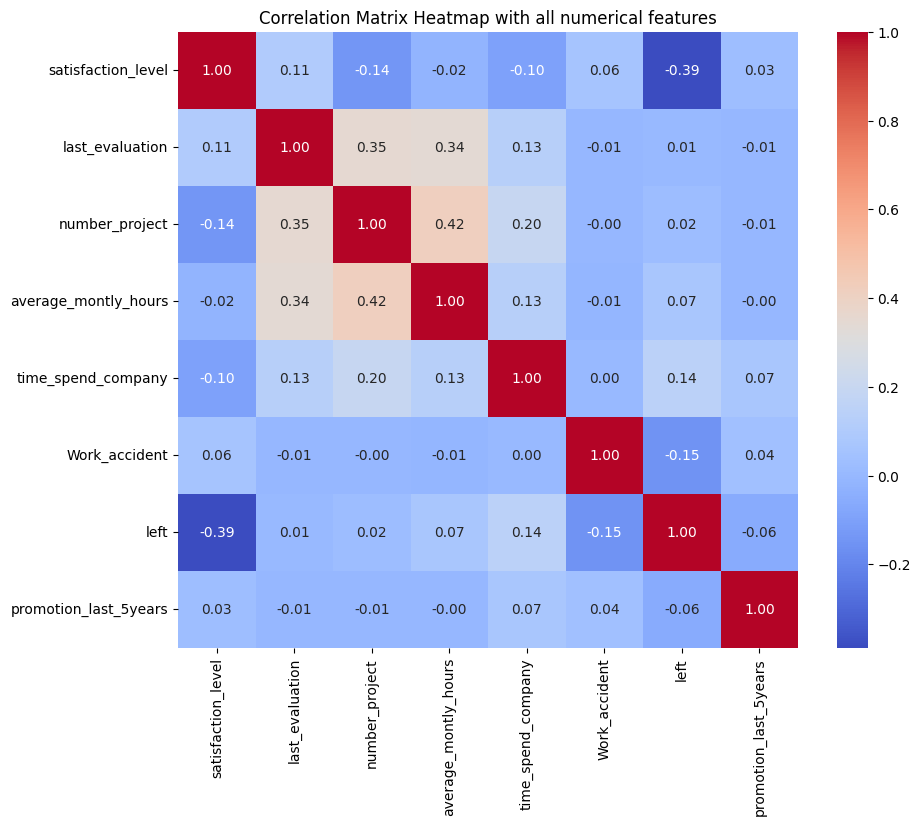

In [ ]:
#  2.1 Draw a heatmap of the correlation matrix between all numerical features or columns in the data.
#  ---------------------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_heatmap = df_original.drop(columns=['sales','salary'])
# Calculate the correlation matrix
correlation_matrix = df_heatmap.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap with all numerical features')
plt.show()

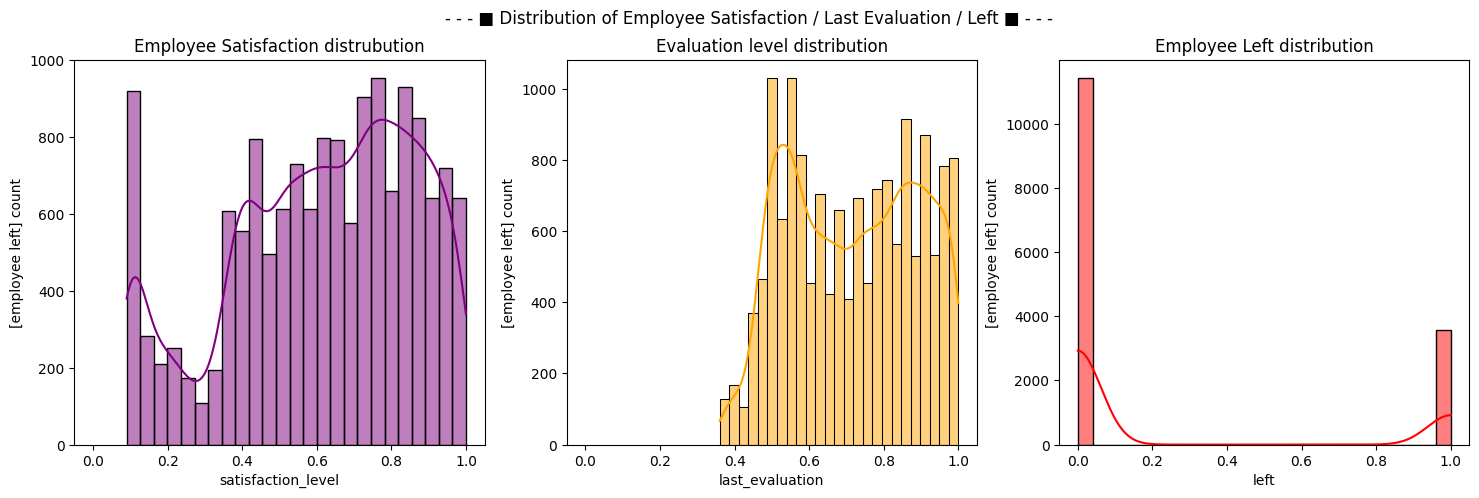

In [ ]:
#  2.2.Draw the distribution plot of:
#             ■ Employee Satisfaction (use column satisfaction_level)
#             ■ Employee Evaluation (use column last_evaluation)
#             ■ Employee Average and Monthly Hours (use column average_montly_hours)
# -----------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

plot_onFeatures = ["satisfaction_level","last_evaluation","left"]

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(18,5))
fig.suptitle('- - - ■ Distribution of Employee Satisfaction / Last Evaluation / Left ■ - - -')

axes[0].set_title('Employee Satisfaction distrubution')
axes[0].set(ylabel='[employee left] count')
sns.histplot(df_original[plot_onFeatures[0]].dropna(), bins=25, kde=True, color="purple", ax=axes[0])

axes[1].set_title('Evaluation level distribution')
axes[1].set(ylabel='[employee left] count')
sns.histplot(df_original[plot_onFeatures[1]].dropna(), bins=25, kde=True, color="orange", ax=axes[1])

axes[2].set_title('Employee Left distribution')
axes[2].set(ylabel='[employee left] count')
sns.histplot(df_original[plot_onFeatures[2]].dropna(), bins=25, kde=True, color="red", ax=axes[2])

plt.show()

# Percentage wise distribution

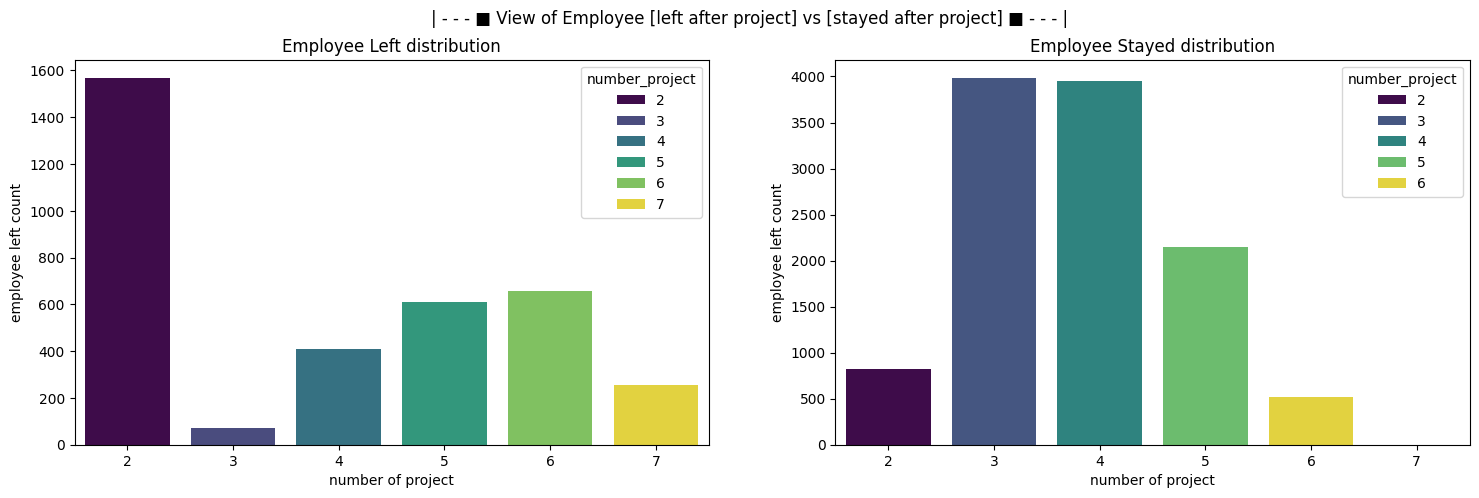

In [ ]:
#  2.3.
#             Draw the bar plot of the employee project count of both employees
#             who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.
#  -------------------------------------------------------------------------------------------------------------------------------------------

left   = 1
stayed = 0

empLeftWithProject = df_original[df_original['left'] == left]
data = empLeftWithProject['number_project'].value_counts()
df = pd.DataFrame(data)

df.columns = ['count']
df = df.reset_index()
df.columns = ['number_project', 'count']

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,5))
fig.suptitle("| - - - ■ View of Employee [left after project] vs [stayed after project] ■ - - - |")

axes[0].set_title('Employee Left distribution')
axes[0].set(xlabel='number of project', ylabel='employee left count')
sns.barplot(x='number_project', y='count', hue = "number_project", data=df, palette='viridis', ax=axes[0])

# --------------------------------------
empStayedWithProject = df_original[df_original['left'] == stayed]
data = empStayedWithProject['number_project'].value_counts()
df = pd.DataFrame(data)

df.columns = ['count']
df = df.reset_index()
df.columns = ['number_project', 'count']

axes[1].set_title('Employee Stayed distribution')
axes[1].set(xlabel='number of project', ylabel='employee left count')
sns.barplot(x='number_project', y='count', hue = "number_project", data=df, palette='viridis', ax=axes[1])

plt.show()

<Figure size 1000x600 with 0 Axes>

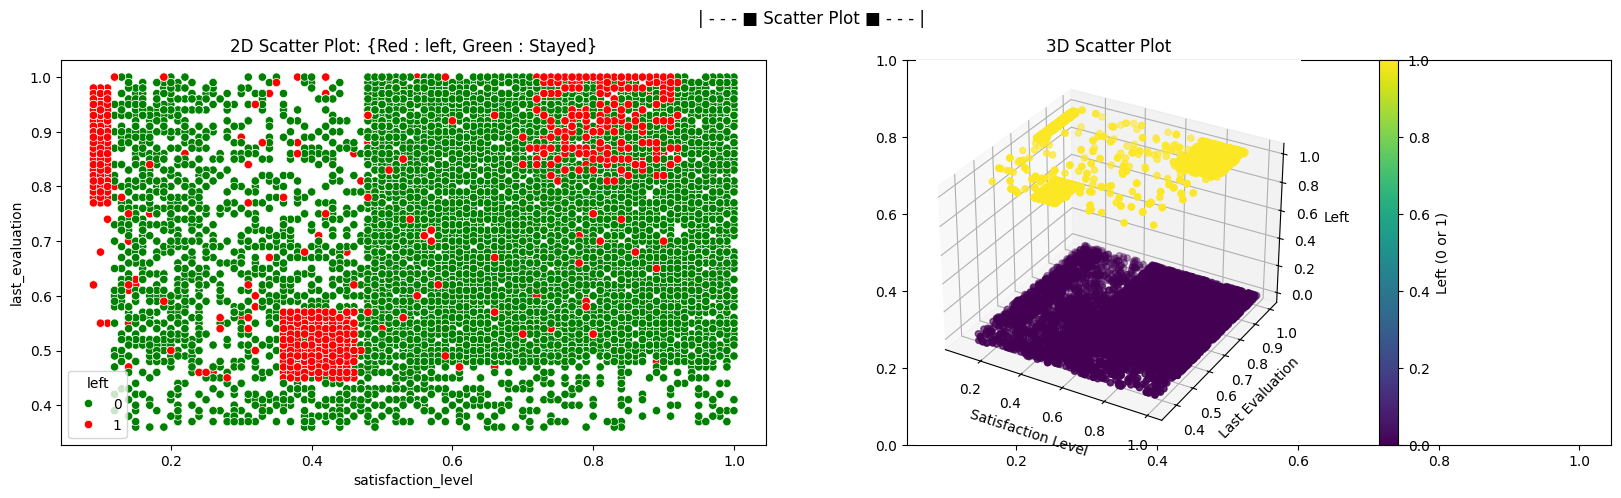

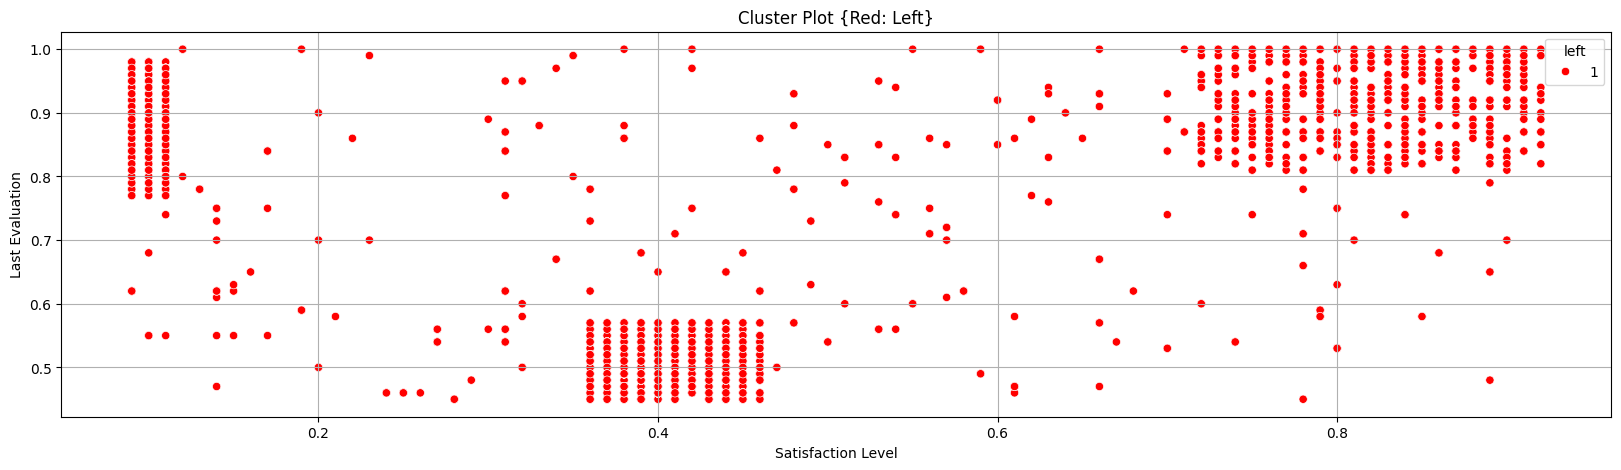

In [ ]:
#  3.
#         Perform clustering of employees who left based on their satisfaction and evaluation.
#         [Choose columns satisfaction_level, last_evaluation, and left as features]

# Clone Dataset to only desired Features and Target
new_df = df_original.filter(['left','satisfaction_level','last_evaluation'], axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
# from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(10, 6))
hue_colors = {1: 'red', 0: 'green'} # 1: Left / 0: Not Left

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))

fig.suptitle("| - - - ■ Scatter Plot ■ - - - |")
axes[0].set_title('2D Scatter Plot: {Red : left, Green : Stayed}')
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='left', data=new_df, palette=hue_colors, ax=axes[0])

# -------------- 3D Plot ----------------------------------
# fig = plt.figure(figsize=(21, 7))

ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors based on 'left' column
scatter = ax.scatter(new_df['satisfaction_level'], new_df['last_evaluation'], new_df['left'], c=new_df['left'], cmap='viridis')

# Set labels and title
ax.set_xlabel('Satisfaction Level')
ax.set_ylabel('Last Evaluation')
ax.set_zlabel('Left')
ax.set_title('3D Scatter Plot')

# Add a color bar
fig.colorbar(scatter, ax=ax, label='Left (0 or 1)')

# Display the plot
plt.show()

#----------------------
df_left_cluster = new_df[new_df['left'] == 1]
# df_stayed_cluster = new_df[new_df['left'] == 0]
plt.figure(figsize=(20, 5))
hue_colors = {1: 'red', 0: 'green'} # 1: Left / 0: Not Left

my_plt = sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='left', data=df_left_cluster, palette=hue_colors)
plt.title('Cluster Plot {Red: Left}')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.grid(True)
plt.show()


In [ ]:
# 3.2 : Do K-means clustering of employees who left the company into 3 clusters?
# Perform clustering of employees who left based on their satisfaction and evaluation.

# Select columns for clustering
features = new_df[['left','satisfaction_level', 'last_evaluation']]

# Optional: Standardize data if features have different scales
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
new_df['Cluster'] = kmeans.fit_predict(features_scaled)

cluster_1 = (new_df[new_df['Cluster'] == 1].head(5))
print(cluster_1)
print("\n")

cluster_0 = (new_df[new_df['Cluster'] == 0].head(5))
print(cluster_0)
print("\n")

   left  satisfaction_level  last_evaluation  Cluster
0     1                0.38             0.53        1
1     1                0.80             0.86        1
2     1                0.11             0.88        1
3     1                0.72             0.87        1
4     1                0.37             0.52        1


      left  satisfaction_level  last_evaluation  Cluster
2000     0                0.58             0.74        0
2001     0                0.82             0.67        0
2002     0                0.45             0.69        0
2003     0                0.78             0.82        0
2004     0                0.49             0.60        0




In [ ]:
# 3.3 : Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.
# Analysis: [Understand what factors contributed most to employee turnover at EDA.]
print("There has been 3 main cases/clusters where Employee Left the Org :- ")
print("-----------------------------------------------------------")
print("1. Due to Better Evaluation Rate but Low Satisfaction Level")
print("2. *** Due to Below Average 'Evaluation Rate' Plus Low or below Avg 'Satisfaction Level'")
print("3. Left despite High Evaluation Rate and Good/High Satisfaction Level : Though this does not co-relate")

There has been 3 main cases/clusters where Employee Left the Org :- 
-----------------------------------------------------------
1. Due to Better Evaluation Rate but Low Satisfaction Level
2. *** Due to Below Average 'Evaluation Rate' Plus Low or below Avg 'Satisfaction Level'
3. Left despite High Evaluation Rate and Good/High Satisfaction Level : Though this does not co-relate


In [ ]:
# 4. Handle the left Class Imbalance using the SMOTE technique.

# 4.1.
# Pre-process the data by converting categorical columns to numerical
# columns by:
# ■ Separating categorical variables and numeric variables
# ■ Applying get_dummies() to the categorical variables
# ■ Combining categorical variables and numeric variables

# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# # ■ Separating categorical variables and numeric variables
# def preprocess_data(df):
#     # Separate categorical and numerical variables
#     categorical_cols = df.select_dtypes(include=['object', 'category']).columns
#     numerical_cols = df.select_dtypes(include=['number']).columns

#     # Encode categorical variables
#     label_encoders = {}
#     for col in categorical_cols:
#             le = LabelEncoder()
#             df[col] = le.fit_transform(df[col])
#             label_encoders[col] = le

#     # return df, categorical_cols, numerical_cols, label_encoders
#     return df, categorical_cols, numerical_cols

# # use Get_Dummies to encode Categorical Data
# def preprocess_data_using_dummies(df):
#     # Separate categorical and numerical variables
#     categorical_cols = df.select_dtypes(include=['object', 'category']).columns
#     numerical_cols = df.select_dtypes(include=['number']).columns

#     # Encode categorical variables using get_dummies
#     df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#     return df, categorical_cols, numerical_cols


# def encode_data(df, encoder):
#     # Separate categorical and numerical variables
#     categorical_cols = df.select_dtypes(include=['object', 'category']).columns
#     numerical_cols = df.select_dtypes(include=['number']).columns

#     label_encoders = {}

#     if encoder == 'label':
#         # Encode categorical variables
#         for col in categorical_cols:
#             le = LabelEncoder()
#             df[col] = le.fit_transform(df[col])
#             label_encoders[col] = le
#     elif encoder == 'onehot':
#         # Encode categorical variables using get_dummies
#         df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#     return df, categorical_cols, numerical_cols, label_encoders


# print("Identifying Categorical and Numerical Columns in teh DataSet")
# print("============================================================")
# df = df_original.copy()
# df_processed, cat_cols, num_cols, label_encoders = encode_data(df, 'onehot')

# print("Categorical Columns : ", cat_cols)
# print("---------------------------------")
# print("Numerical Columns : ", num_cols)

# print("\n\nDataSet ------------")

# df_processed.head()



In [ ]:
# 4. Handle the left Class Imbalance using the SMOTE technique.

# 4.1.
# Pre-process the data by converting categorical columns to numerical
# columns by:
# ■ Separating categorical variables and numeric variables
# ■ Applying get_dummies() to the categorical variables
# ■ Combining categorical variables and numeric variables

def preprocess_data(df):
    # Separate categorical and numerical variables
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    # Apply get_dummies to categorical variables
    df_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)

    # # Keep numerical columns
    df_numerical = df[numerical_cols]

    # Combine categorical and numerical variables
    df_processed = pd.concat([df_numerical, df_categorical], axis=1)

    return df_processed, categorical_cols, numerical_cols, df_categorical, df_numerical


df_processed = ''
df = df_original.copy()
df_processed, cat_cols, num_cols, dfCate, dfNum = preprocess_data(df)


print("Categorical Columns : ", cat_cols)
print("---------------------------------")
print("Numerical Columns : ", num_cols)

print("\n\nDataSet after concat: [Numerical + Categorical]")
print("===================================================")
df_processed.head()


Categorical Columns :  Index(['sales', 'salary'], dtype='object')
---------------------------------
Numerical Columns :  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')


DataSet after concat: [Numerical + Categorical]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


Original dataset shape: Counter({0: 11428, 1: 3571})
total records: 14999
further:---------------------------
left
0    11428
1     3571
Name: count, dtype: int64


<Axes: title={'center': 'Class Distribution (before re-sampling)'}, xlabel='left'>

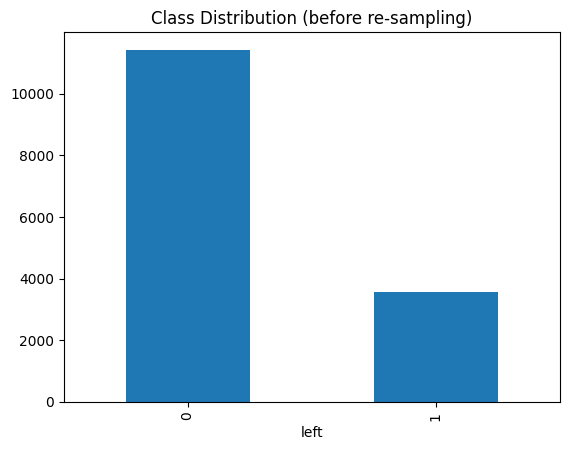

In [ ]:
# Task-4: Handle the left Class Imbalance using the SMOTE technique.
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from collections import Counter

X = df_processed.drop('left', axis=1)
y = df_processed['left']

print(f'Original dataset shape: {Counter(y)}')
print("total records: " + str(len(df_processed)))

print('further:---------------------------')
print(y.value_counts())
y.value_counts().plot(kind='bar', title='Class Distribution (before re-sampling)')

# leftCount = y.value_counts()[1]
# stayedCount = y.value_counts()[0]
# totalData = len(df_processed)

# data = { 'left' : leftCount,'stayed' : stayedCount }

# categories = list(data.keys())
# values = list(data.values())

# # Create bar plot
# sns.barplot(x=categories, y=values, palette="viridis", hue = categories)
# plt.xlabel("Category")
# plt.ylabel("Count")
# plt.title("Category Distribution")
# plt.show()



Length of traing data before sampling  (X_train): 11999
Length of testing data before sampling (X_test) : 3000
--------------------------------------
Original dataset shape -y: Counter({0: 11428, 1: 3571})
After SMOTE > dataset shape -y: Counter({0: 9137, 1: 9137})
left
0    9137
1    9137
Name: count, dtype: int64

--------------------------------------
Length of traing data after sampling  [X_train] : 14619
Length of testing data after sampling [X_test]: 3655




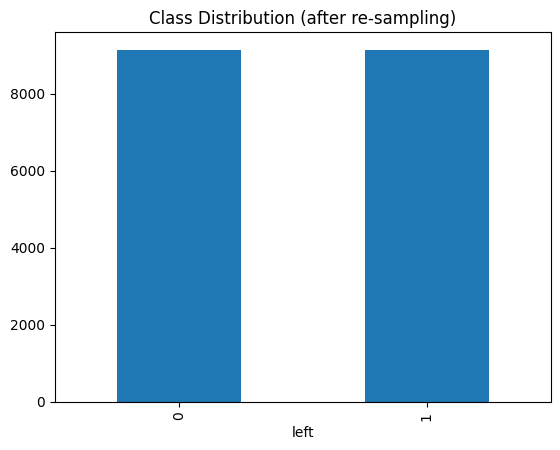

In [ ]:
# Apply SMOTE for ReSampling

splitPercentage = 0.20
randomState = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=splitPercentage, random_state=randomState)

print("Length of traing data before sampling  (X_train): " + str(len(X_train)))
print("Length of testing data before sampling (X_test) : " + str(len(X_test)))
print("--------------------------------------")

# Set k_neighbors to 1, the minimum possible value
smote = SMOTE(random_state=randomState, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f'Original dataset shape -y: {Counter(y)}')
print(f'After SMOTE > dataset shape -y: {Counter(y_train_resampled)}')


print(y_train_resampled.value_counts())

#show plot
y_train_resampled.value_counts().plot(kind='bar', title='Class Distribution (after re-sampling)')

# reset spplit percentage on the reSampling data otherwise it will work on original biased dataset
X = X_train_resampled
y = y_train_resampled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = splitPercentage, random_state = randomState)

print("\n--------------------------------------")
print("Length of traing data after sampling  [X_train] : " + str(len(X_train)))
print("Length of testing data after sampling [X_test]: " + str(len(X_test)))
print("\n")



In [ ]:
len(X_train_resampled), len(X_train)

(18274, 14619)

In [ ]:
### Model Creation

# after resamplig, Set X and Y axis
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size = splitPercentage, random_state = randomState)
#------------------------------


In [ ]:
### Model Creation
# Perform 5-fold cross-validation model training and evaluate performance.
# 5.1. > Train a logistic regression model, apply a 5-fold CV, and plot the classification report.
# 5.2. > Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.
# 5.3. > Train a Gradient Boosting Classifier model, apply the 5-fold CV, and  plot the classification report.

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import xgboost as xgb
import json

accuracy = {};
accuracy_json = []

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

# generic model creation with classifier name
def regression_model(X_test, y_test, X, y, classifier, kfoldCount=5):
    print("\n\n>> Starting classification with : ***", type(classifier).__name__)

    classifier_model = classifier
    classifier_model.fit(X, y)
    y_pred = classifier_model.predict(X_test)

    result = accuracy_score(y_test, y_pred)
    # print("\tAccuracy:",result)


    print("-----------------------------------------------")
    evaluate_model(classifier_model, X, y, X_test, y_test)

    #perfrom cross-validation
    avg_accracy = k_fold_cross_validation(classifier_model, X, y, num_folds=kfoldCount)

    print(f"\n\tAccuracy: {result:.2f}", f",Average accuracy: {avg_accracy:.2f}")

    # accuracy[type(classifier).__name__] = result
    # accuracy[f"{type(classifier).__name__}_avg"] = avg_accracy

    a_json = {
      "model_name" : type(classifier).__name__,
      "accuracy" : result,
      "avg_accuracy" : avg_accracy
    }

    accuracy_json.append(a_json)

    print("End calculation -----------------------------\n")

    return classifier_model

# k-fold > cross validation
def k_fold_cross_validation(model, X, y, num_folds=5):
    print('Showing k-fold cross validation result:')
    from sklearn.model_selection import KFold, cross_val_score

    # Define the k-fold cross-validation method (e.g., 5-fold by default)
    crossValType = KFold(n_splits=num_folds, shuffle=True, random_state=randomState)

    # SHOW Score ----------------------------
    # Perform cross-validation and get accuracy scores for each fold
    cv_scores = cross_val_score(model, X, y, cv=crossValType, scoring='accuracy')
    # Print the accuracy for each fold
    print(f"Accuracy for each fold: {cv_scores}")
    # Print the average accuracy across all folds
    avg_accuracy = cv_scores.mean()
    print(f"Average accuracy: {cv_scores.mean():.2f}")

    return avg_accuracy


In [ ]:
# 5.1. > Train a logistic regression model, apply a 5-fold CV, and plot the classification report.
# 5.2. > Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.
# 5.3. > Train a Gradient Boosting Classifier model, apply the 5-fold CV, and  plot the classification report.

#--------------------Start : Running no of classifiers----#
print("\nTrain a logistic regression model")
print("=======================================")

classifier_model_lr  = regression_model(X_test, y_test, X_train_resampled, y_train_resampled, LogisticRegression(max_iter=1500,random_state=randomState))
classifier_model_rf  = regression_model(X_test, y_test, X_train_resampled, y_train_resampled, RandomForestClassifier(random_state=randomState))
classifier_model_xgb = regression_model(X_test, y_test, X_train_resampled, y_train_resampled, xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=randomState))
# #--------------------End --------------------------------#
accuracy_df = pd.DataFrame(accuracy_json)
accuracy_df.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_df



Train a logistic regression model


>> Starting classification with : *** LogisticRegression
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1812
           1       0.77      0.81      0.79      1843

    accuracy                           0.78      3655
   macro avg       0.79      0.78      0.78      3655
weighted avg       0.79      0.78      0.78      3655

Showing k-fold cross validation result:
Accuracy for each fold: [0.78002736 0.78659371 0.76880985 0.77893297 0.78544061]
Average accuracy: 0.78

	Accuracy: 0.78 ,Average accuracy: 0.78
End calculation -----------------------------



>> Starting classification with : *** RandomForestClassifier
-----------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1812
           1       1.00      1.00      1.00      1843

    accuracy            

,model_name,accuracy,avg_accuracy
1,RandomForestClassifier,1.000000,0.989165
2,XGBClassifier,0.961696,0.958575
0,LogisticRegression,0.784679,0.779961


In [ ]:
# 6.
# Identify the best model and justify the evaluation metrics used.
  # 6.1 > Find the ROC/AUC for each model and plot the ROC curve.
  # 6.2 > Find the confusion matrix for each of the models.
  # 6.3 > Explain which metric needs to be used from the confusion matrix:
  # Recall or Precision?


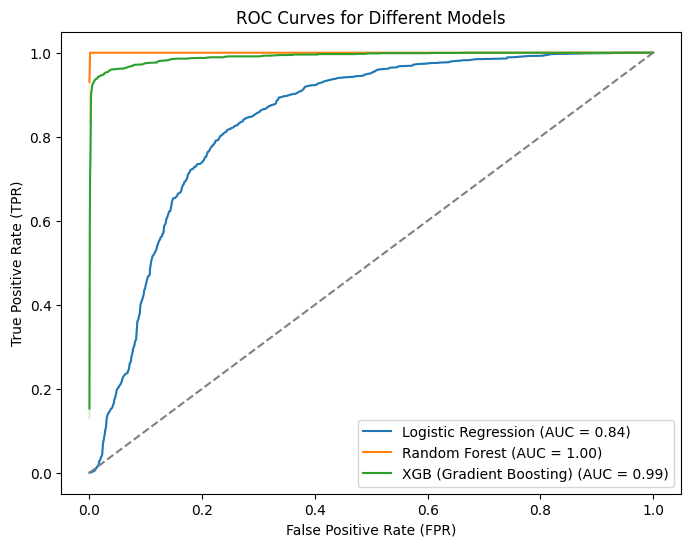

In [ ]:
# 6.1 > Find the ROC/AUC for each model and plot the ROC curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification

models = {
    "Logistic Regression": classifier_model_lr,
    "Random Forest": classifier_model_rf,
    "XGB (Gradient Boosting)": classifier_model_xgb
}

# Train models and compute ROC,AUC,score
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
    fpr, tpr, _ = roc_curve(y_test, y_probs)     # Compute ROC curve
    auc_score = roc_auc_score(y_test, y_probs)   # Compute AUC score

    # Plot ROC Curve
    sns.lineplot(x=fpr, y=tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves for Different Models")
plt.legend()
plt.show()


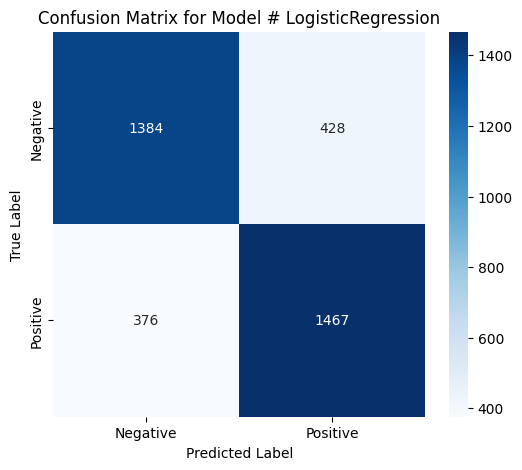

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1812
           1       0.77      0.80      0.78      1843

    accuracy                           0.78      3655
   macro avg       0.78      0.78      0.78      3655
weighted avg       0.78      0.78      0.78      3655

Precision: 0.77
Recall: 0.80
F1-score: 0.78



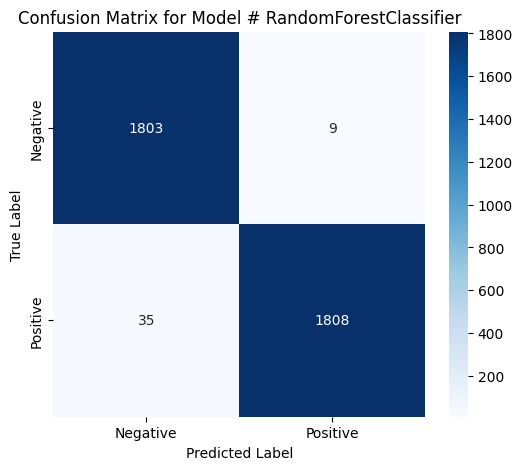

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1812
           1       1.00      0.98      0.99      1843

    accuracy                           0.99      3655
   macro avg       0.99      0.99      0.99      3655
weighted avg       0.99      0.99      0.99      3655

Precision: 1.00
Recall: 0.98
F1-score: 0.99



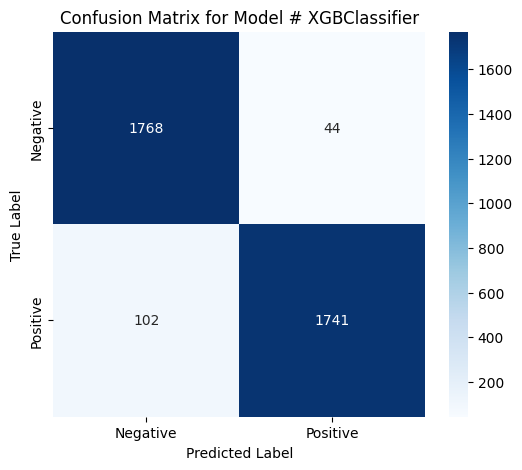

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1812
           1       0.98      0.94      0.96      1843

    accuracy                           0.96      3655
   macro avg       0.96      0.96      0.96      3655
weighted avg       0.96      0.96      0.96      3655

Precision: 0.98
Recall: 0.94
F1-score: 0.96


In [ ]:

# 6.2 > Find the confusion matrix for each of the models.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size = splitPercentage, random_state = randomState)


def Precision_Recall_F1_Score(y_test, y_pred):
    from sklearn.metrics import precision_score, recall_score, f1_score
    # Assume y_test (actual) and y_pred (predicted)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

modelList = [classifier_model_lr, classifier_model_rf, classifier_model_xgb]

for modelToGetCF in modelList:
  print("\n========================================================")
  # do prediction
  model = modelToGetCF
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)  # Get predictions

  # Compute the Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)

  modelStrName = type(model).__name__

  # Plot Confusion Matrix using Seaborn
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix for Model # " + modelStrName)
  plt.show()

  # Print Classification Report
  print("Classification Report:\n", classification_report(y_test, y_pred))
  Precision_Recall_F1_Score(y_test, y_pred)

  print("========================================================")


In [ ]:
# 6.3 > Explain which metric needs to be used from the confusion matrix: Recall or Precision?

# Final Recommendation
  #     If False Positives are worse → Focus on Precision
  #     If False Negatives are worse → Focus on Recall
  #     If both are equally important → Use F1-score

# In this Employee EDA : It is more important that we get maximum TP, as we do not want to have perfect prediction for an individual rather go for most prediction as CORRECT that is
# Maximum TP and less FN : As a Result "RECALL" is suitable over "PRECISION"
print("\nANALYSIS:-------------------------\n")
print("The Employee EDA model use case is best suitable for 'RECALL' over 'PRECESION'")
print("\tas we want to have more correct prediction rather than going correct predict on individual employee.")
print("\nIf we see the 3 models , the MODEL : 'RandomForestClassifier' has highest score as SCORE:100%, AVG Score: 98% ")
print("\tthen on RECALL/Precison/F1 score it has Precision: 1.00, Recall: 0.97, F1-score: 0.99 , that says higher Recall among all models.")
print("\nNote the score may vary on another call")
print("\n")
print("RF : Precision: 1.00, Recall: 0.98, F1-score: 0.99  << *** Best Model Score with higher RECALL point")
print("LR : Precision: 0.77, Recall: 0.80, F1-score: 0.78")
print("XGB: Precision: 0.98, Recall: 0.94, F1-score: 0.96")
print("\n\nWe will see some real live prediction with the model")



ANALYSIS:-------------------------

The Employee EDA model use case is best suitable for 'RECALL' over 'PRECESION'
	as we want to have more correct prediction rather than going correct predict on individual employee.

If we see the 3 models , the MODEL : 'RandomForestClassifier' has highest score as SCORE:100%, AVG Score: 98% 
	then on RECALL/Precison/F1 score it has Precision: 1.00, Recall: 0.97, F1-score: 0.99 , that says higher Recall among all models.

Note the score may vary on another call


RF : Precision: 1.00, Recall: 0.98, F1-score: 0.99  << *** Best Model Score with higher RECALL point
LR : Precision: 0.77, Recall: 0.80, F1-score: 0.78
XGB: Precision: 0.98, Recall: 0.94, F1-score: 0.96


We will see some real live prediction with the model


In [ ]:
# Task: 7
from dataclasses import make_dataclass
from math import e
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size = splitPercentage, random_state = randomState)

best_model = classifier_model_rf # the best model
best_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Get probability of turnover (class 1)

# Calculate Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

df_toTest = X_test.copy()

#loop through X_test
idx = 1
for index, row in df_toTest.iterrows():
       df_toTest.loc[index, "Emp_Id"] = idx
       idx = idx + 1

# Predict Turnover Probability for Test Data
test_predictions = pd.DataFrame({
    "Emp_Id": df_toTest.loc[X_test.index, "Emp_Id"],  # Assuming Employee_ID exists
    "Turnover_Probability": y_prob,
    "left" : y_test,
    'Last_Evaluation' : (X_test['last_evaluation']).map('{:.2%}'.format),
    'Satisfaction_Level': (X_test['satisfaction_level']).map('{:.2%}'.format),
    'Time_spend_company' : X_test['time_spend_company']
})

test_predictions.Emp_Id = test_predictions.Emp_Id.astype(int)

#loop test_prediction
# ■ Safe Zone (Green) (Score < 20%)
# ■ Low-Risk Zone (Yellow) (20% < Score < 60%)
# ■ Medium-Risk Zone (Orange) (60% < Score < 90%)
# ■ High-Risk Zone (Red) (Score > 90%).

test_predictions['Zone'] = 'n/a'
sfz = 0
lrz = 0
mrz = 0
hrz = 0

print("\nPrinting rec: " + str(len(test_predictions)) + " on Test Data (X_test)\n")

for index, row in test_predictions.iterrows():

       prob = test_predictions.loc[index,'Turnover_Probability']
      #  print(prob)

       if (prob < 0.20):
            test_predictions.loc[index,'Zone'] = 'Safe-Zone'
            sfz = sfz + 1
       elif (prob >= 0.20 and prob < 0.60):
            test_predictions.loc[index,'Zone'] = 'Low-Risk'
            lrz = lrz + 1
       elif (prob >= 0.60 and prob < 0.90):
            test_predictions.loc[index,'Zone'] = 'Medium-Risk'
            mrz = mrz + 1
       elif (prob >= 0.90):
            test_predictions.loc[index,'Zone'] = 'High-Risk'
            hrz = hrz + 1
            # print("HRZone")


test_predictions.Turnover_Probability = test_predictions.Turnover_Probability.map('{:.2%}'.format)

# df_toTest.head()

# Display Top Predictions
safe_zonEmp = test_predictions[test_predictions['Zone'] == 'Safe-Zone']
lowRisk_zonEmp = test_predictions[test_predictions['Zone'] == 'Low-Risk']
mediumRisk_zonEmp = test_predictions[test_predictions['Zone'] == 'Medium-Risk']
highRisk_zonEmp = test_predictions[test_predictions['Zone'] == 'High-Risk']
# highRisk_zonEmp["Last_Evaluation"] = highRisk_zonEmp["Last_Evaluation"] * 100
# highRisk_zonEmp["Satisfaction_Level"] = highRisk_zonEmp["Satisfaction_Level"] * 100

print("\n---------------------------------")
print("safe zn :"+ str(sfz) + ",low zn : "+ str(lrz) +",med zn : "+ str(mrz) +", hr zn :" + str(hrz) + "\n")
# print(test_predictions.head())

from json import loads, dumps
result = test_predictions.to_json(orient="split")
parsed = loads(result)

print("\nHigh-Risk Zone Cate:-")
print("========================")
print(highRisk_zonEmp.head())

print("\nMedium-Risk Zone Cate:-")
print("========================")
print(mediumRisk_zonEmp.head())

print("\nLow-Risk Zone Cate:-")
print("========================")
print(lowRisk_zonEmp.head())

print("\nSafe Zone Cate:-")
print("========================")
print(safe_zonEmp.head())
print("\n")

from tabulate import tabulate

print("\nEmployee in High-Risk Zone staying:------------\n")
emp_withHighRiskZon_notLeft = highRisk_zonEmp[highRisk_zonEmp['left'] == stayed]
print(tabulate(emp_withHighRiskZon_notLeft, headers='keys', tablefmt='fancy_grid'))

print("\n\nEmployee in Low-Risk Zone left:------------\n")
emp_withLowRiskZon_left = lowRisk_zonEmp[lowRisk_zonEmp['left'] == left]
print(tabulate(emp_withLowRiskZon_left, headers='keys', tablefmt='fancy_grid'))

# highRisk_zonEmp.to_csv('highRisk_zonEmp.csv', index=False)
# lowRisk_zonEmp.to_csv('lowRisk_zonEmp.csv', index=False)


Accuracy: 0.99
Precision: 1.00
Recall: 0.98
F1-score: 0.99
AUC: 1.00

Printing rec: 3655 on Test Data (X_test)


---------------------------------
safe zn :1741,low zn : 105,med zn : 35, hr zn :1774


High-Risk Zone Cate:-
       Emp_Id Turnover_Probability  left Last_Evaluation Satisfaction_Level  \
15376       7              100.00%     1          49.00%             42.00%   
13823       8              100.00%     1          91.09%             77.04%   
16749       9              100.00%     1          48.00%             45.00%   
12189      10              100.00%     1          46.00%             40.00%   
15414      12              100.00%     1          50.93%             45.84%   

       Time_spend_company       Zone  
15376                   3  High-Risk  
13823                   5  High-Risk  
16749                   3  High-Risk  
12189                   3  High-Risk  
15414                   3  High-Risk  

Medium-Risk Zone Cate:-
       Emp_Id Turnover_Probability  left La

In [ ]:
# Do some real prediction on X_test(20% sample) data using the Best Model

# def prediction_result(last_evaluation, satisfaction_level, expected_prediction, model):
#   _est = pd.DataFrame({'last_evaluation': last_evaluation,'satisfaction_level' : satisfaction_level})
#   pr = model.predict(_est)
#   print(pr)
#   print("Has Prediction gone success :", pr == expected_prediction)

# print("\n Testing Stay chance")
# expected_pred_stay = 0
# prediction_result([0.40], [0.],   expected_pred_stay, classifier_model_rf)

print("Features used in model:", classifier_model_rf.feature_names_in_)

df_pred = X_test.copy()
df_pred["Live_Prediction_using_RF"] = "InProg-RF.."
df_pred["Live_Prediction_using_LR"] = "InProg-LR.."

# X = df_pred
# y =

for index, row in X_test.iterrows():
    new_prediction_rf = classifier_model_rf.predict(row.to_frame().T)
    new_prediction_lr = classifier_model_lr.predict(row.to_frame().T)

    df_pred.loc[index, 'Live_Prediction_using_RF'] = new_prediction_rf[0]
    df_pred.loc[index, 'Live_Prediction_using_LR'] = new_prediction_lr[0]



Features used in model: ['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident'
 'promotion_last_5years' 'sales_RandD' 'sales_accounting' 'sales_hr'
 'sales_management' 'sales_marketing' 'sales_product_mng' 'sales_sales'
 'sales_support' 'sales_technical' 'salary_low' 'salary_medium']


In [ ]:
print(df_pred.columns)
df_todisplay = df_pred[['last_evaluation','satisfaction_level','Live_Prediction_using_RF','Live_Prediction_using_LR']].copy()
df_todisplay["Left"] = y_test
df_todisplay["RF Pred == LR Pred"] = df_todisplay["Live_Prediction_using_RF"] == df_todisplay["Live_Prediction_using_LR"]

# df_todisplay.head()
print(tabulate(df_todisplay.head(30), headers='keys', tablefmt='fancy_grid'))


# print(X.columns)
# print(X_train_resampled.columns)
# print(X_test.columns)



Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium', 'Live_Prediction_using_RF',
       'Live_Prediction_using_LR'],
      dtype='object')
╒═══════╤═══════════════════╤══════════════════════╤════════════════════════════╤════════════════════════════╤════════╤══════════════════════╕
│       │   last_evaluation │   satisfaction_level │   Live_Prediction_using_RF │   Live_Prediction_using_LR │   Left │ RF Pred == LR Pred   │
╞═══════╪═══════════════════╪══════════════════════╪════════════════════════════╪════════════════════════════╪════════╪══════════════════════╡
│  9669 │          0.78     │             0.95     │                          0 │                          

In [224]:
def print_clusterplot(showGrid = False):
  import matplotlib.pyplot as plt
  import seaborn as sns

  X = X_train_resampled
  y = y_train_resampled

  plt_df = pd.DataFrame({
      'last_evaluation': X['last_evaluation'],
      'satisfaction_level': X['satisfaction_level'],
      'left': y
  })

  plt.figure(figsize=(8, 5))

  hue_colors = {1: 'yellow', 0: 'blue'} # 1: Left / 0: Not Left

  my_plt = sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='left', data=plt_df, palette=hue_colors)
  plt.title('Employee Leaving cluster {yellow: Left, blue: Stayed}')
  plt.xlabel('Satisfaction Level')
  plt.ylabel('Last Evaluation')
  if showGrid:
    plt.grid(True)

  plt.show()


Employee retention strategy:-


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


Correlation between 'Left' and 'satisfaction_level': -0.38837498342411414
	-This is good because higher satisfaction means lower employee turnover. 
	-Therefore to retain employee, emp_stisfaction to be considered.


Correlation between 'last evaluation' and 'number of project': 0.3493325885162622
	-This is good because emp doing more projects seems to have higher evaluation rate. And Emp highly evaluated are staying.


Correlation between 'promotion in last5 years' and 'time spend in company': 0.06743292538341991
	-This is good because emp with more promotion seems to be staying in org.


Correlation between last_evaluation'-> satisfaction_level: 0.10502121397148494
	-This cluster indicates employee with good evaluation tend to be more s

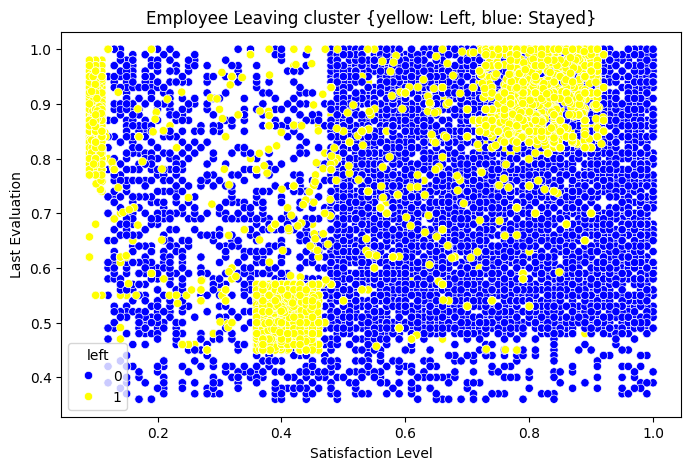


If we the clustering we find, 3 cases employee are leaving
	Case1: Low evaluation with low satisfaction
	Case2: Avg evaluation with avg satisfaction
	Case3: High evaluation with low satisfaction, though in case of good eva and good satisfaction emp also left (may be for some other reasn) to be found. Need here more analysis.


In [ ]:
# Employee Retention Plan
# Calculate the correlation

print("Employee retention strategy:-")
print("===============================")
print("\n")
print(df_original.columns)
print("\n")

dfCorr = df_original.copy()
correlation = dfCorr['left'].corr(dfCorr['satisfaction_level'])
print(f"Correlation between 'Left' and 'satisfaction_level': {correlation}")
print("\t-This is good because higher satisfaction means lower employee turnover. \n\t-Therefore to retain employee, emp_stisfaction to be considered.")

print("\n")
correlation = dfCorr['last_evaluation'].corr(dfCorr['number_project'])
print(f"Correlation between 'last evaluation' and 'number of project': {correlation}")
print("\t-This is good because emp doing more projects seems to have higher evaluation rate. And Emp highly evaluated are staying.")

print("\n")
correlation = dfCorr['promotion_last_5years'].corr(dfCorr['time_spend_company'])
print(f"Correlation between 'promotion in last5 years' and 'time spend in company': {correlation}")
print("\t-This is good because emp with more promotion seems to be staying in org.")

print("\n")
correlation = dfCorr['last_evaluation'].corr(dfCorr['satisfaction_level'])
print(f"Correlation between last_evaluation'-> satisfaction_level: {correlation}")
print("\t-This cluster indicates employee with good evaluation tend to be more satisfied as stayed back. \n\t on an avg emp with 50% good evaluation rate and 50% satisfied levl, has not left the org.")


print_clusterplot()
print("\nOn clustering we find, 3 cases employee are leaving")
print("\tCase1: Low evaluation with low satisfaction")
print("\tCase2: Avg evaluation with avg satisfaction")
print("\tCase3: High evaluation with low satisfaction, though in case of good eva and good satisfaction emp also left (may be for some other reasn) to be found. Need here more analysis.")



In [ ]:

import datetime
print("\n\n END OF ANALYSIS ========================================="+ str(datetime.datetime.now()))